In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("updated_dating.csv")

In [3]:
df.head()

,Unnamed: 0,gender,age,income,career,dec,attr,sinc,intel,fun,amb,like
0,0,0,21.0,69487.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,7.0
1,1,0,21.0,69487.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,7.0
2,2,0,21.0,69487.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0
3,3,0,21.0,69487.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,7.0
4,4,0,21.0,69487.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0


In [4]:
newdf=df.drop(["Unnamed: 0","career"],axis=1)

In [5]:
newdf.head()

,gender,age,income,dec,attr,sinc,intel,fun,amb,like
0,0,21.0,69487.0,1,6.0,9.0,7.0,7.0,6.0,7.0
1,0,21.0,69487.0,1,7.0,8.0,7.0,8.0,5.0,7.0
2,0,21.0,69487.0,1,5.0,8.0,9.0,8.0,5.0,7.0
3,0,21.0,69487.0,1,7.0,6.0,8.0,7.0,6.0,7.0
4,0,21.0,69487.0,1,5.0,6.0,7.0,7.0,6.0,6.0


In [6]:
X=newdf.loc[:,['attr','fun','gender','age','income','sinc','intel','amb','like']]
#Above are independent variables.
Y=newdf.loc[:,"dec"]
#dec is dependent variable.

In [7]:
#splitting the data into train_split and test_split.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [8]:
print(X_train.shape)
print(X_test.shape)

(5632, 9)
(1408, 9)


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


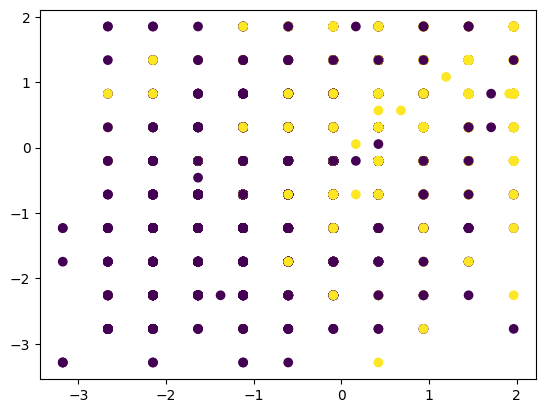

In [11]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)



In [46]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0,C=1)
classifier.fit(X_train,Y_train)
#predicting test results 
Y_pred=classifier.predict(X_test)

In [47]:
from sklearn import metrics 
print("Accuracy score(linear):")
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy score(linear):
0.7606534090909091


In [14]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(X_train,Y_train)
#predicting test results 
Y_pred=classifier.predict(X_test)

In [15]:
from sklearn import metrics 
print("Accuracy score(default_rbf):")
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy score(default_rbf):
0.7670454545454546


In [62]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",gamma=0.1,C=10,random_state=0)
classifier.fit(X_train,Y_train)
#predicting test results 
Y_pred=classifier.predict(X_test)

In [63]:
from sklearn import metrics 
print("Accuracy score(rbf(customised)):")
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy score(rbf(customised)):
0.7713068181818182


In [94]:
#subtask 1 completed ...(accuracy  scores)

In [95]:
#for subtask 2 we need to train model with two features .

In [96]:
X=newdf.loc[:,['attr','fun']]
#attr and fun are independent variables.
Y=newdf.loc[:,"dec"]
#dec is dependent variable.

In [97]:
#splitting the data into train_split and test_split.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [99]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",gamma=2,C=1,random_state=0)
classifier.fit(X_train,Y_train)

SVC(C=1, gamma=2, random_state=0)

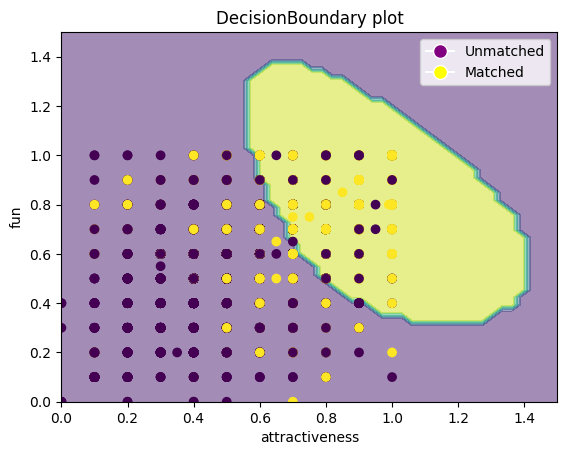

In [102]:
from sklearn.inspection import DecisionBoundaryDisplay
disp=DecisionBoundaryDisplay.from_estimator(classifier,X_train,response_method="predict",alpha=0.5)
scatter=disp.ax_.scatter(X_train[:,0],X_train[:,1],c=Y_train)
disp.ax_.set_xlim(0, 1.5)
disp.ax_.set_ylim(0, 1.5)

disp.ax_.set_xlabel("attractiveness")
disp.ax_.set_ylabel("fun")
disp.ax_.set_title("DecisionBoundary plot")
class_labels = ['Unmatched','Matched']
class_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10),
                 plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10)]
disp.ax_.legend(class_handles, class_labels)